In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [7]:
#import data
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [8]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41935,41975,42033,42092,42297,42463,42609,42795,42969,43035
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374


In [9]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1554,1554,1556,1558,1574,1577,1581,1591,1595,1605
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,543,549,557,559,571,579,590,598,605,612
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2011,2024,2036,2048,2062,2077,2093,2111,2124,2139
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,299,300,303,307,308,308,312,315,317,322


In [10]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34440,34440,34446,34458,34721,34954,34967,35024,35036,35067
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11696,11861,12002,12092,12203,12353,12493,12574,12667,12767
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,41244,41510,41783,42037,42325,42626,42980,42980,43779,44199
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3858,3858,4043,4248,4332,4405,4488,4585,4675,4675
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5350,5626,5647,5899,5927,6036,6125,6250,6326,6345


In [11]:
confirmed.shape

(269, 302)

In [12]:
deaths.shape

(269, 302)

In [14]:
recovered.shape

(256, 302)

In [18]:
dates = confirmed.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1)

In [21]:
all_dates = dates.columns
all_dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/5/20', '11/6/20', '11/7/20', '11/8/20', '11/9/20', '11/10/20',
       '11/11/20', '11/12/20', '11/13/20', '11/14/20'],
      dtype='object', length=298)

In [32]:
#now that we have all the dates we can calculate sums per day
def sum_per_day(data):
    return np.sum(data[all_dates])


In [34]:
overall_confirmed_cases_by_date = sum_per_day(confirmed)
death_by_date = sum_per_day(deaths)
recovered_by_date = sum_per_day(recovered)

In [37]:
#calculate mortality rate
mortality_rate_per_day = death_by_date / overall_confirmed_cases_by_date

In [40]:
mortality = pd.DataFrame(mortality_rate_per_day, columns = ['mortality_rate'])

In [45]:
#function that will calculate moving average
def moving_avg(data, window_size):
    moving = np.zeros(len(data))
    for i in range(len(data)):
        if i + window_size < len(data):
            subset = data[i:i+window_size]
            moving[i] = np.mean(subset)
        else:
            subset = data[i:len(data)]
            moving[i] = np.mean(subset)

    return moving

#function that calculates daily increase in cases
def daily_increase(data):
    daily_increase = np.zeros(len(data))
    for i in range(len(data)):
        if i == 0:
            daily_increase[i] = data[i]
        else:
            daily_increase[i] = data[i] - data[i-1]
    return daily_increase

In [129]:
#daily increase and moving 7 day averages for confirmed cases, deaths and recoveries
daily_case_increase = daily_increase(overall_confirmed_cases_by_date)
moving_avg_cases = moving_avg(overall_confirmed_cases_by_date, 7)
daily_death_increase = daily_increase(death_by_date)
moving_avg_deaths = moving_avg(death_by_date, 7)
daily_recoveries = daily_increase(recovered_by_date)
moving_avg_recoveries = moving_avg(recovered_by_date, 7)

moving_daily_avg = moving_avg(daily_case_increase,7)
moving_death_avg = moving_avg(daily_death_increase, 7)
moving_daily_recoveries = moving_avg(daily_recoveries, 7)

In [63]:
num_days = np.arange(len(all_dates))

In [70]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [87]:
import matplotlib.patches as mpatches

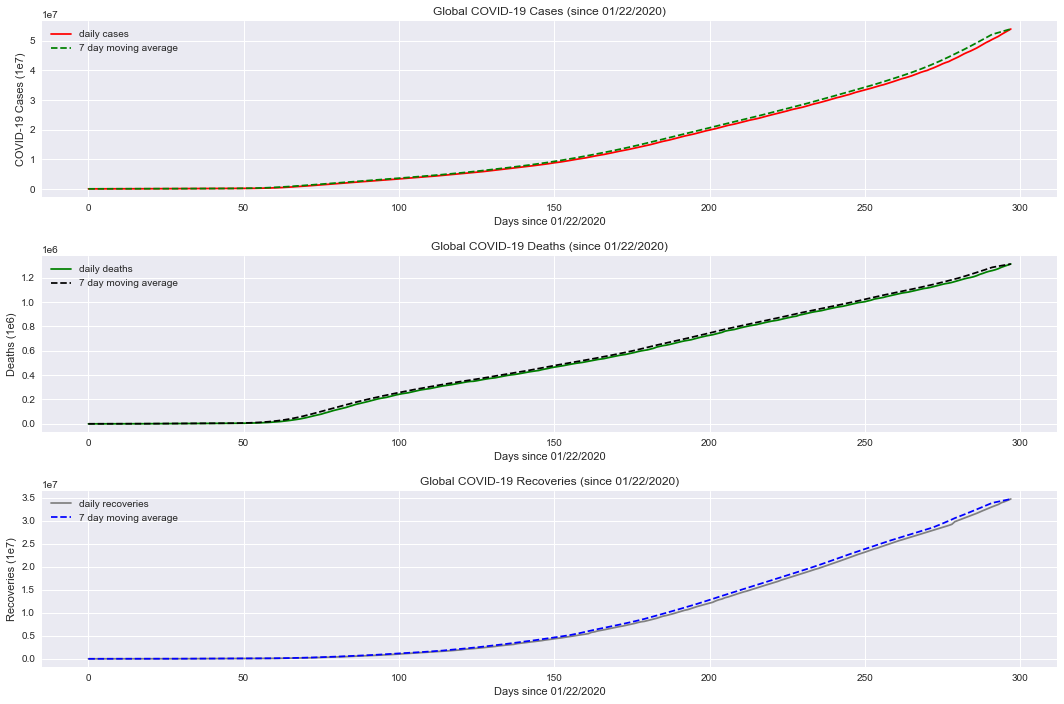

In [114]:
plt.style.use('seaborn')
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (15,10))
ax[0].plot(num_days, overall_confirmed_cases_by_date, color = 'red', label = 'daily cases')
ax[0].plot(num_days, moving_avg_cases, '--', color = 'green', label = '7 day moving average')
ax[0].set_title('Global COVID-19 Cases (since 01/22/2020)')
ax[0].set_xlabel('Days since 01/22/2020')
ax[0].set_ylabel('COVID-19 Cases (1e7)')
ax[0].legend()
ax[1].plot(num_days, death_by_date, color = 'green', label = 'daily deaths')
ax[1].plot(num_days, moving_avg_deaths, '--', color = 'black', label = '7 day moving average')
ax[1].set_title('Global COVID-19 Deaths (since 01/22/2020)')
ax[1].set_xlabel('Days since 01/22/2020')
ax[1].set_ylabel('Deaths (1e6)')
ax[1].legend()
ax[2].plot(num_days, recovered_by_date, color = 'grey', label = 'daily recoveries')
ax[2].plot(num_days, moving_avg_recoveries, '--', color = 'blue', label = '7 day moving average')
ax[2].set_title('Global COVID-19 Recoveries (since 01/22/2020)')
ax[2].set_xlabel('Days since 01/22/2020')
ax[2].set_ylabel('Recoveries (1e7)')
ax[2].legend()
plt.tight_layout()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


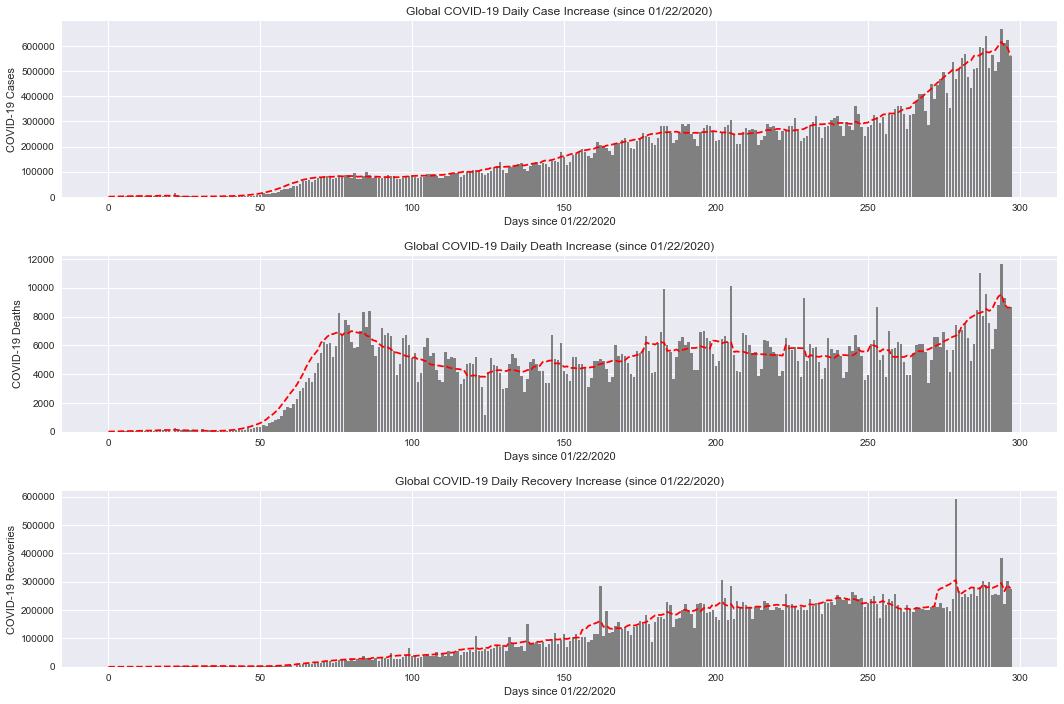

In [139]:
#plots for daily increases
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (15,10))
ax[0].bar(num_days, daily_case_increase, color = 'grey')
ax[0].plot(num_days, moving_daily_avg, '--', color = 'red')
ax[0].set_title('Global COVID-19 Daily Case Increase (since 01/22/2020)')
ax[0].set_xlabel('Days since 01/22/2020')
ax[0].set_ylabel('COVID-19 Cases')
ax[0].legend()
ax[1].bar(num_days, daily_death_increase, color = 'grey')
ax[1].plot(num_days, moving_death_avg, '--', color = 'red')
ax[1].set_title('Global COVID-19 Daily Death Increase (since 01/22/2020)')
ax[1].set_xlabel('Days since 01/22/2020')
ax[1].set_ylabel('COVID-19 Deaths')
ax[1].legend()
ax[2].bar(num_days, daily_recoveries, color = 'grey')
ax[2].plot(num_days,moving_daily_recoveries, '--', color = 'red')
ax[2].set_title('Global COVID-19 Daily Recovery Increase (since 01/22/2020)')
ax[2].set_xlabel('Days since 01/22/2020')
ax[2].set_ylabel('COVID-19 Recoveries')
ax[2].legend()
plt.tight_layout()

In [143]:
#try out models for predicting confirmed cases
X_train, X_test, y_train, y_test = train_test_split(num_days, overall_confirmed_cases_by_date, train_size = .75, shuffle = False)

In [156]:
days_in_future = 10
future = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
model = SVR()
model.fit(np.array(X_train).reshape(-1,1), y_train)
predictions = model.predict(future)

In [157]:
predictions

array([4266148.13315297, 4266147.23846602, 4266146.35023032,
       4266145.46918289, 4266144.59606688, 4266143.73163092,
       4266142.87662847, 4266142.03181712, 4266141.19795791,
       4266140.37581466, 4266139.56615326, 4266138.76974098,
       4266137.98734579, 4266137.2197356 , 4266136.46767764,
       4266135.73193766, 4266135.0132793 , 4266134.31246333,
       4266133.63024698, 4266132.9673832 , 4266132.32461997,
       4266131.7026996 , 4266131.10235799, 4266130.52432398,
       4266129.96931861, 4266129.43805445, 4266128.93123487,
       4266128.44955339, 4266127.99369297, 4266127.56432529,
       4266127.16211015, 4266126.78769473, 4266126.4417129 ,
       4266126.12478463, 4266125.83751525, 4266125.5804948 ,
       4266125.35429741, 4266125.15948061, 4266124.99658472,
       4266124.86613216, 4266124.76862686, 4266124.70455359,
       4266124.6743774 , 4266124.67854291, 4266124.71747379,
       4266124.79157212, 4266124.90121778, 4266125.04676789,
       4266125.22855624,